Link to Google Drive

In [0]:
from google.colab import drive

drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Search Contents of Google Drive for cleaned dataset - 'house_raw.csv'

In [0]:
ls "/content/gdrive/My Drive/Current"

Full.csv               house_raw.csv    NB_train_use.csv
house_price_class.csv  NB_test_use.csv  X_whole.csv


Import necessary packages for dataframe management, matrix math, and graphing.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
X_raw.columns[34]

'LAT'

Upload raw dataset of House data. Convert dataframe to numpy array and view the orginal dataframe. Also create datasets used for mutiple linear regression model.

In [0]:
X_raw= pd.read_csv("/content/gdrive/My Drive/Current/house_raw.csv")
X = X_raw.to_numpy()
X_raw.head
X_new = X_raw.iloc[:,[3,6,11,30,32,33,34]]
X_new.columns
X_lab = X_raw.iloc[:,[3, 5,6,11,30,32,33,34]]

Create classes of classifiers and regression models.

In [0]:
class KNNClassifier():
  def fit(self, X, y):
    self.X = X
    self.y = y.astype(int)
  def predict(self, x, k, epsilon = 1e-3):
    N = len(x)
    y_hat = np.zeros(N)
    for i in range(N):
      dist2 = np.sum((self.X - x[i]) ** 2, axis = 1)
      idxt = np.argsort(dist2)[:k]
      gamma_k = (np.sqrt(dist2[idxt] + epsilon)) ** -1
      y_hat[i] = np.bincount(self.y[idxt], weights = gamma_k).argmax() # why apply radius to labels. why apply proportion when argmax is used?
    return y_hat

class KNNRegressorOG():
  def fit(self, X, y):
    self.X = X
    self.y = y
  def predict(self, X, K, epsilon=1e-3):
    N = len(X)
    y_hat = np.zeros(N)
    for i in range(N):
      dist2 = np.sum((self.X - X[i])**2, axis=1)
      idxt = np.argsort(dist2)[:K]
      gamma_k = 1/(np.sqrt(dist2[idxt]) + epsilon)
      y_hat[i] = gamma_k.dot(self.y[idxt])/gamma_k.sum()
    return y_hat

class KNNRegressor():
  def fit(self, X, y):
    self.X = X
    self.y = y
  def predict(self, X, K, epsilon=1e-3):
    N = len(X)
    y_hat = np.zeros(N)
    for i in range(N):
      dist2 = np.sum((self.X - X[i])**2, axis=1)
      idxt = np.argsort(dist2)[:K]
      gamma_k = dist2[idxt]/dist2[idxt].sum()
      y_hat[i] = gamma_k.dot(self.y[idxt])
    return y_hat
  
class simplelinreg():
  def fit(self, X, y):
    den = np.mean(X**2) - (np.mean(X))**2
    self.w0 = (np.mean(y)*np.mean(X**2) - np.mean(X)*np.mean(X*y))/den
    self.w1 = (np.mean(X*y) - np.mean(X)*np.mean(y)) / den

  def predict(self, X):
    y_hat = self.w0 + self.w1*X
    return y_hat

class multiplelinearregression():
  def fit(self, X, y):
    self.w = np.linalg.solve(X.T@X,X.T@y)
    #np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)),X.T),y)

  def predict(self, X):
    return np.matmul(X, self.w)

  def get_w(self):
    return self.w

class GenMLR():
  def fit(self, X, Y):
    self.w = np.linalg.solve(np.dot(X.T,X), np.dot(X.T, Y))

  def predict(self, X):
    return np.dot(X, self.w)

Create testing functions in order to test models with both categorical and continuous target variables

In [0]:
def accuracy(y, y_hat):
  return np.mean(y == y_hat)

def rmse(y, y_hat):
  return (np.sum((y - y_hat)**2)/len(y))**.5

Run general mutiple linear regression. Store weights (wvec) for future use.



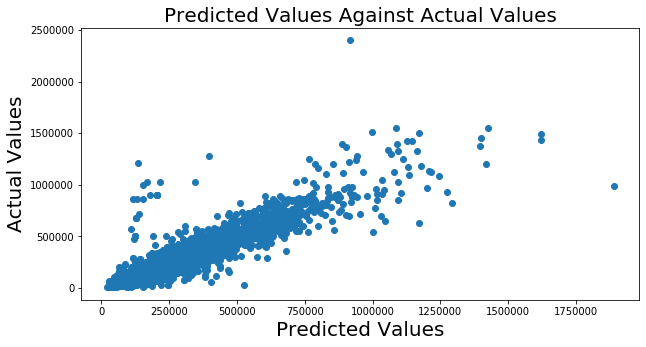

In [0]:
mlr = multiplelinearregression()
X = X_new.to_numpy()
split = .2
np.random.shuffle(X)
N,D = X.shape
y_test = X[:int(split*N),0]
x_test = X[:int(split*N),1:]
y_train = X[int(split*N):,0]
x_train = X[int(split*N):,1:]
mlr.fit(x_train,y_train)
y_hat = mlr.predict(x_test)
accuracy(y_test,y_hat)
plt.figure(figsize = (10,5))
plt.scatter(y_hat, y_test)
plt.title("Predicted Values Against Actual Values", fontsize = 20)
plt.xlabel("Predicted Values", fontsize = 20)
plt.ylabel("Actual Values", fontsize = 20)
wvec = mlr.get_w()

Investigate data by viewing correlation between 'saleprice' and feature variables using simple linear regression

In [0]:
X = X_lab.to_numpy()
slr = simplelinreg()
split = .2
np.random.shuffle(X)
y_test = X[:int(split*N),3]
x_test = X[:int(split*N),6:]
y_train = X[int(split*N):,3]
x_train = X[int(split*N):,6:]
sales_test = X[:int(split*N), 2]
N,D = x_train.shape
rmse_mat = np.zeros((D,2))

for i in range(D):
  slr.fit(x_train[:,i], y_train)
  y_hat = slr.predict(x_test[:,i])
  rmse_mat[i,1] = rmse(y_test, y_hat)
  rmse_mat[i,0] = int(i)
print(rmse_mat[rmse_mat[:,1] == min(rmse_mat[:,1]), 0])
print(rmse_mat)


First convert 'P_cat' into more generalized categories - totaling 8. Then use KNN Classifier and this new variable to classify the training data, then use the test to find observsations that perfectly lined up with classificaiton.

0.7281627951622193


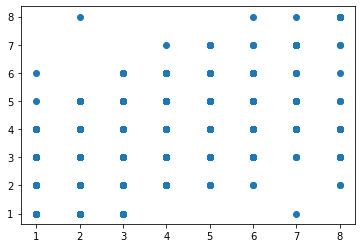

In [0]:
knncl = KNNClassifier()
X = X_raw.to_numpy()
N = X.shape[0]
d = 5
for i in range(N):
  if 0 <= X[i,d] < 5: X[i,d] = 1
  if 5 <= X[i,d] < 10: X[i,d] = 2
  if 10 <= X[i,d] < 15: X[i,d] = 3
  if 15 <= X[i,d] < 20: X[i,d] = 4
  if 20 <= X[i,d] < 25: X[i,d] = 5
  if 25 <= X[i,d] < 30: X[i,d] = 6
  if 30 <= X[i,d] < 35: X[i,d] = 7
  if 35 <= X[i,d]: X[i,d] = 8
split = .2
np.random.shuffle(X)
y_test = X[:int(split*N),5]
x_test = X[:int(split*N),6:]
y_train = X[int(split*N):,5]
x_train = X[int(split*N):,6:]
sales_test = X[:int(split*N), 3]
knncl.fit(x_train,y_train)
y_hat = knncl.predict(x_test, 15)
print(accuracy(y_test,y_hat))
plt.figure()
plt.scatter(y_test, y_hat)

Use new subset of test data (that lined up with Classifier) to test the initial model.

In [0]:
temp = x_test[y_test == y_hat, :]
temp_sales = sales_test[y_test == y_hat]
temp_sp = temp@wvec
temp_sp.shape
plt.figure()
plt.title("Categorically Typical Subset", fontsize = 20)
plt.xlabel("Predicted Values", fontsize = 20)
plt.ylabel("Actual Values", fontsize = 20)
plt.scatter(temp_sp, temp_sales)


Try aligned subset of data with other independent variables to see if we can intuit anything from it.

In [0]:
temp.shape
temp_new = y_test[y_test == y_hat]
plt.figure()
#plt.xlabel("Latitude", fontsize = 20)
#plt.ylabel("Price per SqFt Category", fontsize = 20)
#plt.scatter(sales_test[y_test == y_hat], temp[:,0])
plt.scatter(temp[:,30], temp_new)

Investigate data by viewing correlation between 'prpersqft' and other feature variables

No handles with labels found to put in legend.


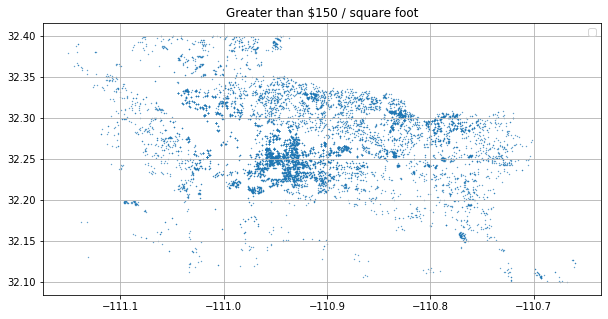

In [0]:
n = 3

plt.figure(figsize = (10,5))
plt.scatter(X[X[:,5] > n,33], X[X[:,5] > n,34], s = .1)
#plt.legend(handles = [1,2,3,4,5,6,7,8], labels = ["1","2","3","4","5","6","7","8"])
plt.title("Greater than $150 / square foot")
plt.legend()
plt.grid(True)

Zoom in on relevant area

In [0]:
X = X[X[:,33] > -111.15,:]
X = X[X[:,33] < -110.65,:]
X = X[X[:,34] > 32.1,:]
X = X[X[:,34] < 32.4,:]